In [1]:
import pandas as pd
import seaborn as sns
import bokeh as bk
import matplotlib.pyplot as plt

In [2]:
# %load "../Utils/Preprocessing/create_mapping.py"
# def create_Mapping(map_to, to_be_mapped, data_file="../Data/Crime_Data_from_2010_to_Present.csv"):
#     data = pd.read_csv(data_file)
#     mapped_dict = {}
#     data_together = pd.DataFrame(trimmed_crime_data,columns = list([map_to,to_be_mapped]))
#     unique_data = data_together.drop_duplicates()
    
#     mapped_dict = {code:item for code,item in zip(unique_data[map_to],unique_data[to_be_mapped])}
#     reverse_mapping = {item:code for code,item in zip(unique_data[map_to],unique_data[to_be_mapped])}
    
#     return mapped_dict,reverse_mapping

def create_mapping(col1,col2,df):
    df = df.drop_duplicates()
    mapped_dict  = {code:item for code,item in zip(df[col1],df[col2])}
    reverse_mapped = {item:code for code,item in zip(df[col1],df[col2])}
    
    return mapped_dict,reverse_mapped


In [3]:
crime_data_file = "../Data/Crime_Data_from_2010_to_Present.csv"
crime_data = pd.read_csv(crime_data_file,parse_dates=['Date Reported','Date Occurred'])

In [4]:
crime_data.head()
# crime_data.shapepe

DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    2013-03-14    2013-03-11           1800       12  77th Street   
1  102005556    2010-01-25    2010-01-22           2300       20      Olympic   
2        418    2013-03-19    2013-03-18           2030       18    Southeast   
3  101822289    2010-11-11    2010-11-10           1800       18    Southeast   
4   42104479    2014-01-11    2014-01-04           2300       21      Topanga   

   Reporting District  Crime Code                    Crime Code Description  \
0                1241         626         INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                          VEHICLE - STOLEN   
2                1823         510                          VEHICLE - STOLEN   
3                1803         510                          VEHICLE - STOLEN   
4                2133         745  VANDALISM - MISDEAMEANOR ($399 OR UNDER)   

              MO Codes          ...           \
0  0416 0446 1243 2000          ...            
1                  NaN          ...            
2                  NaN          ...            
3                  NaN          ...            
4                 0329          ...            

                               Weapon Description Status Code  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)          AO   
1                                             NaN          IC   
2                                             NaN          IC   
3                                             NaN          IC   
4                                             NaN          IC   

  Status Description  Crime Code 1 Crime Code 2  Crime Code 3 Crime Code 4  \
0        Adult Other         626.0          NaN           NaN          NaN   
1        Invest Cont         510.0          NaN           NaN          NaN   
2        Invest Cont         510.0          NaN           NaN          NaN   
3        Invest Cont         510.0          NaN           NaN          NaN   
4        Invest Cont         745.0          NaN           NaN          NaN   

                                   Address Cross Street             Location   
0  6300    BRYNHURST                    AV          NaN  (33.9829, -118.3338)  
1                                 VAN NESS         15TH  (34.0454, -118.3157)  
2   200 E  104TH                        ST          NaN   (33.942, -118.2717)  
3                                     88TH         WALL  (33.9572, -118.2717)  
4  7200    CIRRUS                       WY          NaN  (34.2009, -118.6369)  

[5 rows x 26 columns]

In [5]:
crime_data.describe()

DR Number  Time Occurred       Area ID  Reporting District  \
count  1.705094e+06   1.705094e+06  1.705094e+06        1.705094e+06   
mean   1.385812e+08   1.363462e+03  1.114144e+01        1.160522e+03   
std    2.401780e+07   6.465884e+02  5.993539e+00        5.993485e+02   
min    2.100000e+02   1.000000e+00  1.000000e+00        1.000000e+02   
25%    1.203252e+08   9.300000e+02  6.000000e+00        6.450000e+02   
50%    1.408049e+08   1.430000e+03  1.200000e+01        1.204000e+03   
75%    1.608154e+08   1.900000e+03  1.600000e+01        1.675000e+03   
max    9.102204e+08   2.359000e+03  2.100000e+01        2.198000e+03   

         Crime Code    Victim Age  Premise Code  Weapon Used Code  \
count  1.705094e+06  1.568081e+06  1.705006e+06     564873.000000   
mean   5.068571e+02  3.597204e+01  3.120247e+02        370.765997   
std    2.105156e+02  1.681131e+01  2.105535e+02        113.853506   
min    1.100000e+02  1.000000e+01  1.010000e+02        101.000000   
25%    3.300000e+02  2.300000e+01  1.020000e+02        400.000000   
50%    4.400000e+02  3.400000e+01  2.100000e+02        400.000000   
75%    6.260000e+02  4.800000e+01  5.010000e+02        400.000000   
max    9.560000e+02  9.900000e+01  9.710000e+02        516.000000   

       Crime Code 1   Crime Code 2  Crime Code 3  Crime Code 4  
count  1.705088e+06  108192.000000   2445.000000     80.000000  
mean   5.067278e+02     953.103002    970.221677    969.462500  
std    2.104252e+02     124.747281     88.896149     91.413505  
min    1.100000e+02     210.000000     93.000000    421.000000  
25%    3.300000e+02     998.000000    998.000000    998.000000  
50%    4.400000e+02     998.000000    998.000000    998.000000  
75%    6.260000e+02     998.000000    998.000000    998.000000  
max    9.990000e+02     999.000000    999.000000    999.000000

In [6]:
crime_data.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        392
MO Codes                   185027
Victim Age                 137013
Victim Sex                 157166
Victim Descent             157203
Premise Code                   88
Premise Description          3259
Weapon Used Code          1140221
Weapon Description        1140222
Status Code                     2
Status Description              0
Crime Code 1                    6
Crime Code 2              1596902
Crime Code 3              1702649
Crime Code 4              1705014
Address                         0
Cross Street              1421730
Location                        9
dtype: int64

In [7]:
trimmed_crime_data = crime_data.drop(['Crime Code 2','Crime Code 3','Crime Code 4','Cross Street','Weapon Used Code','Weapon Description','DR Number', 'Area Name'],axis=1)
trimmed_crime_data = trimmed_crime_data.dropna()
trimmed_crime_data = trimmed_crime_data[trimmed_crime_data['Victim Sex']!= 'H']
trimmed_crime_data.isnull().sum()
# trimmed_crime_data.to_csv("Clean_data.csv")

In [23]:
crime_by_area = trimmed_crime_data.groupby(by="Area ID")
victims_by_gender = trimmed_crime_data.groupby(by='Victim Sex')
victims_by_ethnicity = trimmed_crime_data.groupby(by='Victim Descent')
crime_by_crime_code = trimmed_crime_data.groupby(by='Crime Code')

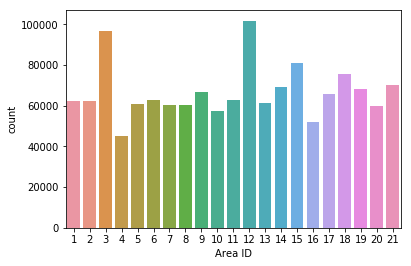

In [26]:
sns.countplot(x="Area ID", data = trimmed_crime_data)
plt.show()

In [28]:
crime_by_area.count()['Crime Code']

Area ID
1      62593
2      62563
3      96685
4      45171
5      60962
6      62911
7      60157
8      60470
9      66710
10     57381
11     62728
12    101848
13     61379
14     69213
15     81030
16     51864
17     65838
18     75761
19     68026
20     60120
21     70367
Name: Crime Code, dtype: int64

In [17]:
sns.countplot(x="Victim Sex", data = trimmed_crime_data)
plt.show()

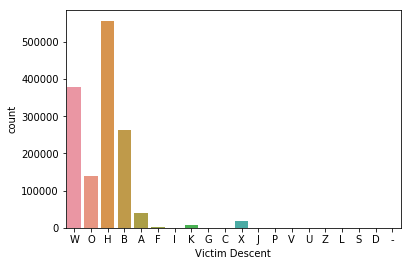

In [13]:
sns.countplot(x="Victim Descent", data = trimmed_crime_data)
plt.show()

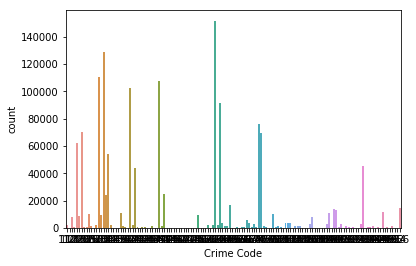

In [19]:
sns.countplot(x="Crime Code", data = trimmed_crime_data)
plt.show()

In [49]:
#crime_by_crime_code.type
#crime_by_crime_code_df = pd.DataFrame(crime_by_crime_code)
#crime_by_crime_code_df.sort_values(by='Date Reported', ascending=False)
#crime_by_crime_code.count()
crime_by_area_df = pd.DataFrame({'count' : crime_by_area.size()}).reset_index()

In [65]:
areaID_to_areaName,areaName_to_areaID = create_mapping('Area ID','Area Name',crime_data)

# crime_by_area_df.set_index("Area ID")
print(areaID_to_areaName)
print(areaName_to_areaID)
crime_by_area_df['Area Name'] = crime_by_area_df['Area ID'].apply(lambda x:areaID_to_areaName[x])
crime_by_area_df

{12: '77th Street', 20: 'Olympic', 18: 'Southeast', 21: 'Topanga', 1: 'Central', 11: 'Northeast', 16: 'Foothill', 19: 'Mission', 9: 'Van Nuys', 13: 'Newton', 15: 'N Hollywood', 10: 'West Valley', 14: 'Pacific', 17: 'Devonshire', 2: 'Rampart', 3: 'Southwest', 4: 'Hollenbeck', 5: 'Harbor', 6: 'Hollywood', 8: 'West LA', 7: 'Wilshire'}
{'77th Street': 12, 'Olympic': 20, 'Southeast': 18, 'Topanga': 21, 'Central': 1, 'Northeast': 11, 'Foothill': 16, 'Mission': 19, 'Van Nuys': 9, 'Newton': 13, 'N Hollywood': 15, 'West Valley': 10, 'Pacific': 14, 'Devonshire': 17, 'Rampart': 2, 'Southwest': 3, 'Hollenbeck': 4, 'Harbor': 5, 'Hollywood': 6, 'West LA': 8, 'Wilshire': 7}


Area ID   count    Area Name
0         1   62593      Central
1         2   62563      Rampart
2         3   96685    Southwest
3         4   45171   Hollenbeck
4         5   60962       Harbor
5         6   62911    Hollywood
6         7   60157     Wilshire
7         8   60470      West LA
8         9   66710     Van Nuys
9        10   57381  West Valley
10       11   62728    Northeast
11       12  101848  77th Street
12       13   61379       Newton
13       14   69213      Pacific
14       15   81030  N Hollywood
15       16   51864     Foothill
16       17   65838   Devonshire
17       18   75761    Southeast
18       19   68026      Mission
19       20   60120      Olympic
20       21   70367      Topanga

In [72]:
for i in crime_by_area_df.iterrows():
    print(i[1][2],i[1][1])

Central 62593
Rampart 62563
Southwest 96685
Hollenbeck 45171
Harbor 60962
Hollywood 62911
Wilshire 60157
West LA 60470
Van Nuys 66710
West Valley 57381
Northeast 62728
77th Street 101848
Newton 61379
Pacific 69213
N Hollywood 81030
Foothill 51864
Devonshire 65838
Southeast 75761
Mission 68026
Olympic 60120
Topanga 70367


In [90]:
crime_by_crime_code_df = pd.DataFrame({'count' : crime_by_crime_code.size()}).reset_index()
# crime_by_crime_code_df = pd.DataFrame(crime_by_crime_code)
# crime_by_crime_code_df.sort_values(by='Date Reported', ascending=False)
crime_by_crime_code_df = crime_by_crime_code_df.sort_values(by="count",ascending=False)
crime_by_crime_code_df = crime_by_crime_code_df[:10]
crimeCode_to_crime,crime_to_crimeCode = create_mapping('Crime Code','Crime Code Description',trimmed_crime_data)
crime_by_crime_code_df['Crime Description'] = crime_by_crime_code_df['Crime Code'].apply(lambda x:crimeCode_to_crime[x])

crime_by_crime_code_df

Crime Code   count                                  Crime Description
61         624  151775                           BATTERY - SIMPLE ASSAULT
15         330  128982                              BURGLARY FROM VEHICLE
13         310  110368                                           BURGLARY
38         440  107900                 THEFT PLAIN - PETTY ($950 & UNDER)
26         354  102725                                  THEFT OF IDENTITY
63         626   91713                  INTIMATE PARTNER - SIMPLE ASSAULT
79         740   75869  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
6          230   70353     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
80         745   69433           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4          210   61882                                            ROBBERY

In [95]:
trimmed_crime_data['Date Occurred'] = pd.to_datetime(trimmed_crime_data['Date Occurred'])

KeyboardInterrupt: 

In [76]:



# Analysing crime rates of various crimes from 2010 to present
crimeCode_to_crime,crime_to_crimeCode = create_mapping('Crime Code','Crime Code Description',trimmed_crime_data)


In [78]:
crimeCode_to_crime

{110: 'CRIMINAL HOMICIDE',
 113: 'MANSLAUGHTER, NEGLIGENT',
 121: 'RAPE, FORCIBLE',
 122: 'RAPE, ATTEMPTED',
 210: 'ROBBERY',
 220: 'ATTEMPTED ROBBERY',
 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 231: 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 235: 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
 236: 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 237: 'CHILD NEGLECT (SEE 300 W.I.C.)',
 250: 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
 251: 'SHOTS FIRED AT INHABITED DWELLING',
 310: 'BURGLARY',
 320: 'BURGLARY, ATTEMPTED',
 330: 'BURGLARY FROM VEHICLE',
 331: 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
 343: 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
 345: 'DISHONEST EMPLOYEE - GRAND THEFT',
 347: 'GRAND THEFT / INSURANCE FRAUD',
 349: 'GRAND THEFT / AUTO REPAIR',
 350: 'THEFT, PERSON',
 351: 'PURSE SNATCHING',
 352: 'PICKPOCKET',
 353: 'DRUNK ROLL',
 354: 'THEFT OF IDENTITY',
 410: 'BU